BERT adopts masked language modeling (MLM) for pre-training and is one of the most successful pre-training models.<br>
Since BERT neglects dependency among predicted tokens, XLNet introduces permuted language modeling (PLM) for pre-training to address this problem. However, XLNet does not leverage the full position information of a sentence and thus suffers from position discrepancy between pre-training and fine-tuning.<br> 

In this paper, we propose MPNet, a novel pre-training method that inherits the advantages of BERT and XLNet and avoids their limitations. MPNet leverages the dependency among predicted tokens through permuted language modeling (vs. MLM in BERT), and takes auxiliary position information as input to make the model see a full sentence and thus reducing the position discrepancy (vs. PLM in XLNet). We pre-train MPNet on a large-scale dataset (over 160GB text corpora) and fine-tune on a variety of down-streaming tasks (GLUE, SQuAD, etc). Experimental results show that MPNet outperforms MLM and PLM by a large margin, and achieves better results on these tasks compared with previous state-of-the-art pre-trained methods (e.g., BERT, XLNet, RoBERTa) under the same model setting.

MPNet, a novel pre-training method that inherits the advantages of BERT and XLNet and avoids their limitations. MPNet leverages the dependency among predicted tokens through permuted language modeling (vs. MLM in BERT), and takes auxiliary position information as input to make the model see a full sentence and thus reducing the position discrepancy (vs. PLM in XLNet).We pre-train MPNet on a large-scale dataset (over 160GB text corpora) and fine-tune on a variety of down-streaming tasks (GLUE, SQuAD, etc). Experimental results show that MPNet outperforms MLM and PLM by a large margin, and achieves better results on these tasks compared with previous state-of-the-art pre-trained methods (e.g., BERT, XLNet, RoBERTa) under the same model setting.

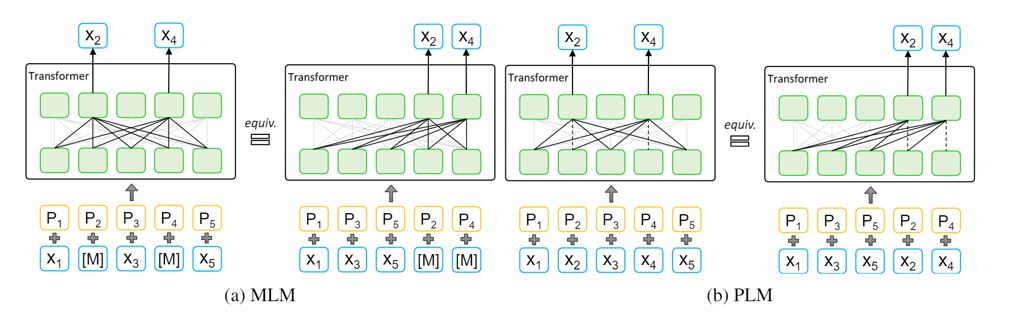

Figure 1: (a) Masked language modeling (MLM) and (b) permuted language modeling (PLM). The right subfigure in both (a) and (b) are the unified view of MLM and PLM.

**A unified view of MLM and PLM**<br>
To better inherit the advantages of MLM and PLM, we analyze them under a unified view. Pretrained models usually adopt Transformer as the basic model structure, which is not sensitive to the order of the tokens as long as a token is added with the correct position information. In this way, the two subfigures in Figure 1(a) are equivalent, and the two in Figure 1(b) are also equivalent. We can regard the two right subfigures in Figure 1(a) and Figure 1(b) as the unified view of MLM and PLM. Therefore, we can divide the input sequence in MLM and PLM into a non-predicted part and a predicted part.


***Combining the best of both worlds***<br>
Based on the unified view, we can see that the non-predicted parts in MLM and PLM are the same, while the predicted parts are different. The advantage of MLM is that it can see the position information of the full sentence by introducing mask symbol [M] and its position information in the non-predicted part, while the advantage of PLM is that it can model the dependency among the predicted tokens with autoregressive generation in the predicted part. How can a model inherit their advantages while avoiding their limitations? Our work, the novel pretrained language model MPNet, uses masked and permuted language modeling to model the dependency among predicted tokens and see the position information of the full sentence.
We first fuse the non-predicted part of MLM and PLM together. For example, given the sequence x=(x1, x2, x3, x4, x5), if permuting it into (x1, x3, x5, x2, x4), we select the tokens in the right part (x4, x6, x2) as the predicted tokens, and we set the non-predicted part as (x1, x3, x5, [M], [M], [M]) and the corresponding position information as (p1, p3, p5, p4, p6, p2). As shown in Figure 2, we introduce the output dependency and input consistency to inherit the advantages of MLM and PLM.

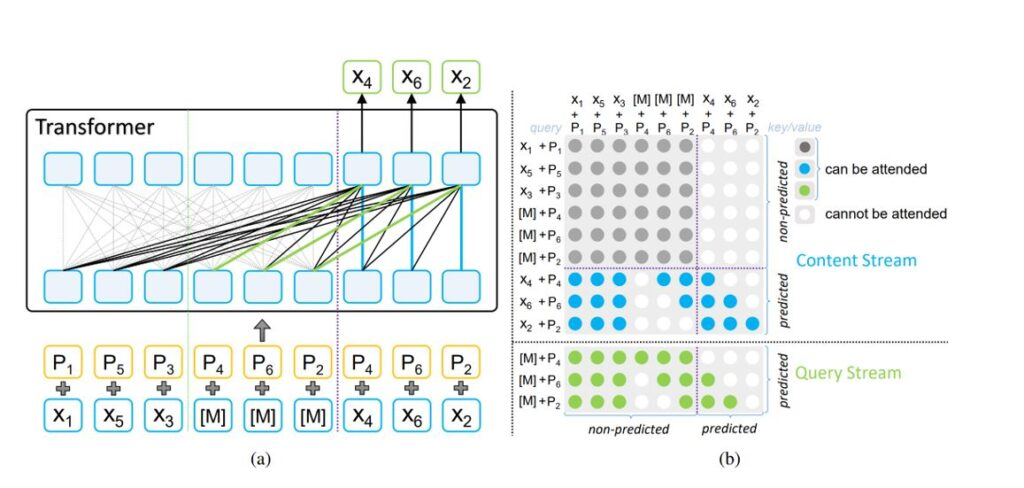
Figure 2: (a) The model structure of MPNet; (b) the masking in the two-stream self-attention in MPNet.

## Output dependency
To model the dependency among the predicted tokens, we adopt the two-stream self-attention found in PLM for autoregressive generation. We design different masking mechanisms in the query and content stream of the two-stream self-attention to allow the token in the predicted part to see the previously predicted tokens. For example, when predicting token x6, the model can see (x1+p1, x3+p3, x5+p5) in the non-predicted part and the previous predicted (x4+p4) in the predicted part, which can avoid the missing dependency information in MLM.

## Input consistency
To make the input information in pretraining consistent with that in downstream tasks, we add the mask symbol and position information of the predicted token ([M]+p4, [M]+p6, [M]+p2) in the non-predicted part to ensure each token can see the position information of the full sentence. For example, when predicting token x6, it can not only see the original (x1+p1, x3+p3, x5+p5) in the non-predicted part and the previous predicted information (x4+p4), but it can also see ([M]+p6, [M]+p2) in the non-predicted part. Through position compensation, the model can see the position information of the full sentence when predicting each token, which avoids the missing position information in PLM.
Method analysis
To analyze the advantages of MPNet, we compare the information usage of different pretraining objectives, as shown in Table 1 (assuming all objectives predict 15% tokens). We find MPNet can leverage 92.5% of token information and 100% of position information, which combines the best of both worlds in MLM and PLM.
Objective	# Tokens	# Positions
MLM (BERT)	85%	100%
PLM (XLNet)	92.5%	92.5%
MPNet	92.5%	100%
Table 1: The information usage of different pretraining objectives
